In [1]:
import pandas as pd
import numpy as np
import os
pd.reset_option('display.max_columns', 100)
pd.reset_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('../input/tabular-playground-series-nov-2022/sample_submission.csv', index_col='id')
df.head(2)

,pred
id,
20000,0.640707
20001,0.636904


In [3]:
labels = pd.read_csv('../input/tabular-playground-series-nov-2022/train_labels.csv')
labels.head(3)

,id,label
0,0,0
1,1,1
2,2,1


In [4]:
subs = sorted(os.listdir('/kaggle/input/tabular-playground-series-nov-2022/submission_files')) #Sabel el número de submission files
s0 = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2022/submission_files/' + subs[0], index_col='id') # Primer submission file

X_train = np.zeros((s0.shape[0], len(subs))) #Creamos base de training
for i, name in enumerate(subs): #Ciclo para llenar la base de training
    sub = pd.read_csv('/kaggle/input/tabular-playground-series-nov-2022/submission_files/' + name, index_col='id')
    X_train[:,i] = sub.pred.values
X_train = pd.DataFrame(X_train, columns=subs)# Base de training
X_train.head(2)

,0.6222863195.csv,0.6223807245.csv,0.6225426578.csv,0.6247722291.csv,0.6253455681.csv,0.6254850917.csv,0.6255093621.csv,0.6260141578.csv,0.6263493693.csv,0.6272779211.csv,...,0.7519100517.csv,0.7519556278.csv,0.7520219713.csv,0.7521219579.csv,0.7522329272.csv,0.7523602310.csv,0.7526089604.csv,0.7526999358.csv,0.7551167673.csv,0.7575039918.csv
0,0.709336,0.799007,0.851891,0.537158,0.623930,0.705970,0.503437,0.633185,0.641550,0.666604,...,0.769207,0.750250,0.663370,0.739333,0.822384,0.749498,0.729800,0.867847,0.745888,0.787
1,0.452988,0.364453,0.567582,0.354468,0.513818,0.584119,0.454809,0.238501,0.472171,0.522314,...,0.640052,0.794052,0.721298,0.804369,0.620626,0.733606,0.816942,0.814229,0.598331,0.547


In [5]:
X_train['label'] = labels['label']
X_train.head(1)

,0.6222863195.csv,0.6223807245.csv,0.6225426578.csv,0.6247722291.csv,0.6253455681.csv,0.6254850917.csv,0.6255093621.csv,0.6260141578.csv,0.6263493693.csv,0.6272779211.csv,...,0.7519556278.csv,0.7520219713.csv,0.7521219579.csv,0.7522329272.csv,0.7523602310.csv,0.7526089604.csv,0.7526999358.csv,0.7551167673.csv,0.7575039918.csv,label
0,0.709336,0.799007,0.851891,0.537158,0.62393,0.70597,0.503437,0.633185,0.64155,0.666604,...,0.75025,0.66337,0.739333,0.822384,0.749498,0.7298,0.867847,0.745888,0.787,0.0


In [6]:
test = X_train[20000:]
X_train = X_train[:20000]
len(test)

20000

# Filtro 

In [7]:
from sklearn.metrics import roc_auc_score
columns = []
bad = []
for i in range(0, len(X_train.columns)-1):
    auc = roc_auc_score(X_train['label'], X_train[X_train.columns[i]])
    if auc >= 0.78:
        columns.append(X_train.columns[i])
        
train = X_train.filter(items=columns)

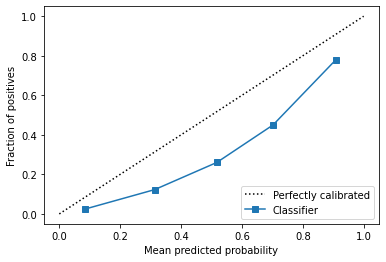

In [8]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay #Para graficar si esta calibrado o no
from sklearn.isotonic import IsotonicRegression
from sklearn.calibration import CalibratedClassifierCV
disp = CalibrationDisplay.from_predictions(X_train['label'], train['0.6426110725.csv'])
plt.show()

In [9]:
test = test.filter(items=columns)
test

,0.6225426578.csv,0.6294457895.csv,0.6404491258.csv,0.6407502338.csv,0.6426110725.csv,0.6453694232.csv,0.6454086279.csv,0.6454375051.csv,0.6460118158.csv,0.6464892546.csv,...,0.6969193975.csv,0.6975177755.csv,0.6996196858.csv,0.7002002165.csv,0.7028148087.csv,0.7033865713.csv,0.7051369296.csv,0.7079314921.csv,0.7160613710.csv,0.7164992684.csv
20000,0.795757,0.794785,0.783486,0.787893,0.820141,0.832688,0.843260,0.826338,0.837845,0.796241,...,0.80056,0.848412,0.792710,0.829399,0.837234,0.901585,0.833992,0.817208,0.825587,0.852352
20001,0.842078,0.758897,0.763573,0.715719,0.852634,0.887907,0.861234,0.891609,0.850622,0.809581,...,0.77724,0.849418,0.832893,0.813959,0.723098,0.900543,0.814384,0.758742,0.815730,0.780966
20002,0.542698,0.588272,0.566542,0.421511,0.548017,0.497853,0.473092,0.507006,0.466100,0.543121,...,0.61149,0.601734,0.617050,0.634666,0.634573,0.418453,0.624151,0.631707,0.562517,0.551725
20003,0.591969,0.675415,0.627598,0.623674,0.611502,0.667465,0.601698,0.661131,0.554552,0.662555,...,0.59768,0.608732,0.708992,0.618968,0.668591,0.625794,0.645964,0.662762,0.708487,0.666050
20004,0.043050,0.210955,0.388847,0.208134,0.189660,0.189838,0.563306,0.153227,0.733446,0.492676,...,0.70112,0.750630,0.750585,0.721456,0.315084,0.716885,0.734520,0.693671,0.615438,0.176220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.483297,0.401280,0.447231,0.486676,0.419320,0.481173,0.589274,0.480533,0.537624,0.483769,...,0.49943,0.474724,0.589535,0.496561,0.508758,0.462045,0.565653,0.533173,0.498068,0.567969
39996,0.594827,0.573821,0.612897,0.580056,0.566908,0.577789,0.768477,0.559754,0.682243,0.644317,...,0.56857,0.610592,0.746561,0.612850,0.542002,0.657321,0.646697,0.577580,0.547230,0.598730
39997,0.760426,0.734550,0.707009,0.771873,0.774592,0.764246,0.766593,0.760474,0.757130,0.752734,...,0.75381,0.774321,0.782527,0.796487,0.685132,0.858230,0.806492,0.749391,0.757184,0.769139
39998,0.807093,0.837783,0.800612,0.720346,0.684314,0.734020,0.650269,0.727397,0.668914,0.815538,...,0.71777,0.761883,0.742271,0.739249,0.714672,0.748554,0.742975,0.712589,0.805455,0.687243


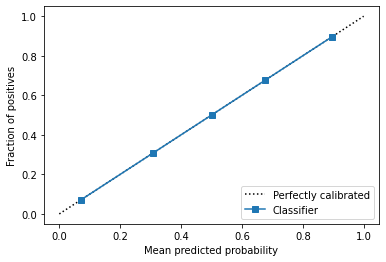

In [10]:
for i in range(0, len(train.columns)-1):
    x_model_calibration = np.zeros(40000)
    model_calibration = IsotonicRegression(out_of_bounds='clip')
    x_model_calibration[:20000] = model_calibration.fit_transform(train[train.columns[i]], X_train['label'])
    x_model_calibration[20000:] = model_calibration.transform(test[test.columns[i]])
    train[train.columns[i]] = x_model_calibration[:20000]
    test[test.columns[i]] = x_model_calibration[20000:]

disp = CalibrationDisplay.from_predictions(X_train['label'], train['0.6426110725.csv'])
plt.show()

In [11]:
train['label'] = X_train['label']

In [12]:
Features = np.array(train[train.columns[:-1]])
Features

array([[0.7151277 , 0.62962963, 0.57042254, ..., 0.54732143, 0.47660819,
        0.927354  ],
       [0.3401421 , 0.48513011, 0.35042735, ..., 0.47853736, 0.4       ,
        0.787957  ],
       [0.60917031, 0.60194175, 0.58409786, ..., 0.54732143, 0.47660819,
        0.862402  ],
       ...,
       [0.78078078, 0.81873112, 0.90310078, ..., 0.82396088, 0.86332574,
        0.929273  ],
       [0.46960486, 0.48513011, 0.47886029, ..., 0.51569038, 0.47660819,
        0.771653  ],
       [1.        , 0.97885196, 0.90310078, ..., 0.91346154, 0.94805195,
        0.983335  ]])

# Final training - test

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import lightgbm as lgb 
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier #Para combinar todos estos modelos

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
Features = np.array(train[train.columns[:-1]])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Train, X_test, y_train, y_test = train_test_split(Features, train['label'], test_size=0.20)
#scaler.fit(X_Train)
#X_Train = scaler.transform(X_Train)
#X_test = scaler.transform(X_test)

In [14]:
RF = RandomForestClassifier(max_depth=10, criterion='entropy', n_estimators=135, 
                                 max_features='sqrt')

xgb = XGBClassifier( booster = 'gbtree', eta = 0.10125618161723826, gamma = 8.09559100935248, max_depth = 5)

lgbm = lgb.LGBMClassifier( boosting_type = 'dart', learning_rate = 0.05485316689256563, 
                        n_estimators = 532, max_depth = 3)

hist = HistGradientBoostingClassifier(learning_rate = 0.10738488344314048, 
                        max_iter = 189, max_depth = 4)

In [15]:
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
RF.fit(X_Train, y_train)
xgb.fit(X_Train, y_train)
lgbm.fit(X_Train, y_train)
hist.fit(X_Train, y_train)

HistGradientBoostingClassifier(learning_rate=0.10738488344314048, max_depth=4,
                               max_iter=189)

In [16]:
#Performance con el training set
RFout = RF.predict_proba(X_Train)
xgbout = xgb.predict_proba(X_Train)
lgbmout = lgbm.predict_proba(X_Train)
histout = hist.predict_proba(X_Train)
loss2 = log_loss(y_train, RFout)
auc2 = roc_auc_score(y_train, RFout[:,1])
RMSE2 = mean_squared_error(y_train, RFout[:,1])
loss3 = log_loss(y_train, xgbout)
auc3 = roc_auc_score(y_train, xgbout[:,1])
RMSE3 = mean_squared_error(y_train, xgbout[:,1])
loss4 = log_loss(y_train, lgbmout)
auc4 = roc_auc_score(y_train, lgbmout[:,1])
RMSE4 = mean_squared_error(y_train, lgbmout[:,1])
loss5 = log_loss(y_train, histout)
auc5 = roc_auc_score(y_train, histout[:,1])
RMSE5 = mean_squared_error(y_train, histout[:,1])
print('RF',loss2, auc2, RMSE2)
print('XGB',loss3, auc3, RMSE3)
print('LGBM',loss4, auc4, RMSE4)
print('Hist',loss5, auc5, RMSE5)

RF 0.4389525957138409 0.8825203759964536 0.14455298537502792
XGB 0.49768504058825785 0.8305612881320166 0.1679321528995698
LGBM 0.4942662323272886 0.8342185429068554 0.1664909225268171
Hist 0.5017341621852033 0.8242192529851416 0.17037748535853445


In [17]:
#Performance con el test set
RFout2 = RF.predict_proba(X_test)
xgbout2 = xgb.predict_proba(X_test)
lgbmout2 = lgbm.predict_proba(X_test)
histout2 = hist.predict_proba(X_test)
loss2 = log_loss(y_test, RFout2)
auc2 = roc_auc_score(y_test, RFout2[:,1])
RMSE2 = mean_squared_error(y_test, RFout2[:,1])
loss3 = log_loss(y_test, xgbout2)
auc3 = roc_auc_score(y_test, xgbout2[:,1])
RMSE3 = mean_squared_error(y_test, xgbout2[:,1])
loss4 = log_loss(y_test, lgbmout2)
auc4 = roc_auc_score(y_test, lgbmout2[:,1])
RMSE4 = mean_squared_error(y_test, lgbmout2[:,1])
loss5 = log_loss(y_test, histout2)
auc5 = roc_auc_score(y_test, histout2[:,1])
RMSE5 = mean_squared_error(y_test, histout2[:,1])
print('RF',loss2, auc2, RMSE2)
print('XGB',loss3, auc3, RMSE3)
print('LGBM',loss4, auc4, RMSE4)
print('Hist',loss5, auc5, RMSE5)

RF 0.523491714898801 0.8095365224255586 0.1777874396561684
XGB 0.523289827294182 0.8097786996261406 0.17777761062994457
LGBM 0.5231823585578426 0.8094146824999298 0.17792568793997623
Hist 0.5227501324935093 0.8111970766431985 0.177320389234367


In [18]:
d = {'RF': RFout2[:,1], 'XGB': xgbout2[:,1], 'LGBM': lgbmout2[:,1], 'HIST': histout2[:,1],'label': y_test}
data2 = pd.DataFrame(d)
data2.head(2)

,RF,XGB,LGBM,HIST,label
439,0.204914,0.201969,0.229654,0.258677,0.0
17058,0.278051,0.272690,0.263999,0.259431,0.0


In [19]:
eclf1 = VotingClassifier(estimators=[('Hist', hist), ('XGB', xgb), ('LGBM', lgbm), ('RF', RF)], voting='soft')
eclf1 = eclf1.fit(X_Train, y_train)

In [20]:
y_score_final2 = eclf1.predict_proba(X_test)
y_score_final3 = eclf1.predict_proba(X_Train)
data2['Voting'] = y_score_final2[:, 1]

In [21]:
#For training set
loss = log_loss(y_train, y_score_final3[:,1])
auc = roc_auc_score( y_train, y_score_final3[:,1])
print('Vot',loss, auc) #0.5147512576097621 0.8152999222657191

Vot 0.47944652477052296 0.8449404203063389


In [22]:
#For testing set
loss = log_loss(data2['label'], 0.7*data2['Voting'] + 0.20*data2['HIST'] + 0.05*data2['XGB'])
auc = roc_auc_score(data2['label'], 0.5*data2['Voting'] + 0.5*data2['HIST'])
print('Vot',loss, auc)
#Solo Vot y Hist - 80-20
#0.5059376416350578 - 80-10-10
#0.5059527940173068 - 70-15-15
#0.5059353328851255 - 100-0-0
#0.5064740129035157 - 33-33-33
#0.5060113590153529 - 50-25-25
#0.5062011097467499 - 50-40-10
#0.5060654966615944 - 50-30-20
#0.5059662013200614 - 50-20-30
#0.5059354206336484 - 60-15-25
#0.5059023474310624 - 60-10-30
#0.505884127135133 - 70-5-25
#0.5058629502215635 - 70-0-30
#0.5061226518118392 - 70-30-0
#0.5060354404911177 - 80-20-0
#0.5058752251309158 - 80-0-20

Vot 0.5293786237384251 0.8111183127036091


In [23]:
data2.corr()

,RF,XGB,LGBM,HIST,label,Voting
RF,1.000000,0.992329,0.991971,0.991942,0.537855,0.995624
XGB,0.992329,1.000000,0.996712,0.995200,0.537977,0.998278
LGBM,0.991971,0.996712,1.000000,0.994994,0.537425,0.998232
HIST,0.991942,0.995200,0.994994,1.000000,0.539706,0.996387
label,0.537855,0.537977,0.537425,0.539706,1.000000,0.538933
Voting,0.995624,0.998278,0.998232,0.996387,0.538933,1.000000


In [24]:
FeaturesTest = np.array(test[test.columns[:]])
FeaturesTest

array([[0.60917031, 0.60194175, 0.58409786, ..., 0.61483254, 0.53833333,
        0.852352  ],
       [0.70469799, 0.56677524, 0.55395683, ..., 0.51569038, 0.53833333,
        0.780966  ],
       [0.29273084, 0.33684211, 0.29304813, ..., 0.33190578, 0.25675676,
        0.551725  ],
       ...,
       [0.57462687, 0.49753695, 0.47886029, ..., 0.47853736, 0.47660819,
        0.769139  ],
       [0.61488673, 0.71641791, 0.58409786, ..., 0.46848542, 0.53833333,
        0.687243  ],
       [0.38356164, 0.37827715, 0.35042735, ..., 0.34693878, 0.32183908,
        0.618504  ]])

In [25]:
#FeaturesTest = scaler.transform(FeaturesTest)
FeaturesTest

array([[0.60917031, 0.60194175, 0.58409786, ..., 0.61483254, 0.53833333,
        0.852352  ],
       [0.70469799, 0.56677524, 0.55395683, ..., 0.51569038, 0.53833333,
        0.780966  ],
       [0.29273084, 0.33684211, 0.29304813, ..., 0.33190578, 0.25675676,
        0.551725  ],
       ...,
       [0.57462687, 0.49753695, 0.47886029, ..., 0.47853736, 0.47660819,
        0.769139  ],
       [0.61488673, 0.71641791, 0.58409786, ..., 0.46848542, 0.53833333,
        0.687243  ],
       [0.38356164, 0.37827715, 0.35042735, ..., 0.34693878, 0.32183908,
        0.618504  ]])

In [26]:
eclf1 = VotingClassifier(estimators=[('Hist', hist), ('XGB', xgb), ('LGBM', lgbm), ('RF', RF)], voting='soft')
eclf1 = eclf1.fit(Features, train['label'])
hist = hist.fit(Features, train['label'])
xgb = xgb.fit(Features, train['label'])
final_pred = eclf1.predict_proba(FeaturesTest)
final_pred2 = hist.predict_proba(FeaturesTest)
final_pred3 = xgb.predict_proba(FeaturesTest)
df['pred'] = 0.85*final_pred[:, 1] + 0.15*final_pred2[:, 1]+ 0.0*final_pred3[:, 1]
submission = df.filter(items={'id', 'pred'})
submission.head(20)

,pred
id,
20000,0.592851
20001,0.669549
20002,0.242986
20003,0.418430
20004,0.049313
20005,0.296718
20006,0.441960
20007,0.784431
20008,0.800568


In [27]:
submission.to_csv('submission.csv')